<a href="https://colab.research.google.com/github/bluecityisu/class2022/blob/main/lstm_reg5_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.12.0


In [36]:
url='/content/drive/MyDrive/python_bank/reg/smonth.xlsx'
data = pd.read_excel(url)
fn=[]
final=[]
final2=[]
data.tail()

,t,ss,s1609,s3529,s2352,s3704
40,2023-05-31,0.625565,1.038060,0.949198,1.632821,1.436839
41,2023-06-30,0.773135,1.990836,1.543149,2.095250,1.644775
42,2023-07-31,0.873641,1.870151,0.973277,2.570011,2.424535
43,2023-08-31,0.650271,1.781225,0.909066,1.965770,1.738346
44,2023-09-28,0.527520,1.971780,1.230121,1.941107,2.008663


In [37]:
model = Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,input_shape=[1,],return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  Dense(64, activation='relu'),
  Dense(128, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])
model.compile(loss='mean_absolute_error', optimizer='adam')

In [38]:
ss=data.pop('ss')
loop=len(data.columns)-1
for i in range(loop):
  fn.append(data.columns[i+1])
loop

4

In [39]:
for i in range(loop):
  target=data[data.columns[i+1]]
  newset=pd.DataFrame(target)

  #newset.insert(1,"s2",0)
  #newset["s2"]=newset[newset.columns[0]]-ss
  newset.insert(1,"s2",0)
  for j in range(len(newset)-1):#
    newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#
  newset=newset.drop(newset.index[0],axis=0)#

  newset=newset.drop(newset.index[-1],axis=0)
  ss1=ss.drop(ss.index[0],axis=0)
  ss1=ss1.drop(ss1.index[0],axis=0) #
  data2 = pd.concat([ss1, newset], axis=1, join='inner')
  train_dataset = data2[0:36]
  test_dataset = data2.drop(train_dataset.index)
  train_features = train_dataset.copy()
  test_features = test_dataset.copy()

  train_labels = train_features.pop('ss')
  test_labels = test_features.pop('ss')

  train_features=np.expand_dims(train_features,-1)
  test_features=np.expand_dims(test_features,-1)
  history = model.fit(train_features, train_labels, epochs=500)
  hist = pd.DataFrame(history.history)
  re=np.array(hist)
  final.append(re[-1,0])
  test_results = {}
  test_results['model'] = model.evaluate(test_features, test_labels, verbose=0)
  final2.append(test_results['model'])

Epoch 1/500


<ipython-input-39-55847aee2ad5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


2/2 [==============================] - 12s 30ms/step - loss: 0.8351
Epoch 2/500
2/2 [==============================] - 0s 34ms/step - loss: 0.8273
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 0.8200
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 0.8076
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 0.7856
Epoch 6/500
2/2 [==============================] - 0s 27ms/step - loss: 0.7579
Epoch 7/500
2/2 [==============================] - 0s 30ms/step - loss: 0.7201
Epoch 8/500
2/2 [==============================] - 0s 30ms/step - loss: 0.6701
Epoch 9/500
2/2 [==============================] - 0s 29ms/step - loss: 0.6022
Epoch 10/500
2/2 [==============================] - 0s 32ms/step - loss: 0.5463
Epoch 11/500
2/2 [==============================] - 0s 32ms/step - loss: 0.5673
Epoch 12/500
2/2 [==============================] - 0s 30ms/step - loss: 0.5822
Epoch 13/500
2/2 [==============================] - 0s 26ms/

<ipython-input-39-55847aee2ad5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


Epoch 1/500
2/2 [==============================] - 0s 17ms/step - loss: 0.5211
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 0.5251
Epoch 3/500
2/2 [==============================] - 0s 16ms/step - loss: 0.5144
Epoch 4/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4957
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4894
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 0.4921
Epoch 7/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4873
Epoch 8/500
2/2 [==============================] - 0s 18ms/step - loss: 0.4836
Epoch 9/500
2/2 [==============================] - 0s 20ms/step - loss: 0.4850
Epoch 10/500
2/2 [==============================] - 0s 18ms/step - loss: 0.5097
Epoch 11/500
2/2 [==============================] - 0s 19ms/step - loss: 0.5303
Epoch 12/500
2/2 [==============================] - 0s 18ms/step - loss: 0.4988
Epoch 13/500
2/2 [==============================]

<ipython-input-39-55847aee2ad5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


2/2 [==============================] - 0s 19ms/step - loss: 0.4088
Epoch 4/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3774
Epoch 5/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3665
Epoch 6/500
2/2 [==============================] - 0s 18ms/step - loss: 0.3391
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 0.3057
Epoch 8/500
2/2 [==============================] - 0s 20ms/step - loss: 0.2999
Epoch 9/500
2/2 [==============================] - 0s 19ms/step - loss: 0.3084
Epoch 10/500
2/2 [==============================] - 0s 18ms/step - loss: 0.2994
Epoch 11/500
2/2 [==============================] - 0s 20ms/step - loss: 0.3054
Epoch 12/500
2/2 [==============================] - 0s 18ms/step - loss: 0.3015
Epoch 13/500
2/2 [==============================] - 0s 20ms/step - loss: 0.2987
Epoch 14/500
2/2 [==============================] - 0s 18ms/step - loss: 0.2821
Epoch 15/500
2/2 [==============================] - 0s 18ms

<ipython-input-39-55847aee2ad5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


2/2 [==============================] - 0s 33ms/step - loss: 0.6263
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 0.6174
Epoch 3/500
2/2 [==============================] - 0s 27ms/step - loss: 0.6033
Epoch 4/500
2/2 [==============================] - 0s 26ms/step - loss: 0.5805
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5544
Epoch 6/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5260
Epoch 7/500
2/2 [==============================] - 0s 26ms/step - loss: 0.4932
Epoch 8/500
2/2 [==============================] - 0s 27ms/step - loss: 0.4639
Epoch 9/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4454
Epoch 10/500
2/2 [==============================] - 0s 27ms/step - loss: 0.4311
Epoch 11/500
2/2 [==============================] - 0s 24ms/step - loss: 0.4175
Epoch 12/500
2/2 [==============================] - 0s 35ms/step - loss: 0.4023
Epoch 13/500
2/2 [==============================] - 0s 25ms/s

In [40]:
print(final)
print(fn)

[0.2999758720397949, 0.13684506714344025, 0.07668855786323547, 0.17050491273403168]
['s1609', 's3529', 's2352', 's3704']


In [41]:
final2

[0.3296067416667938,
 0.5234776139259338,
 0.6786248087882996,
 0.5831674337387085]

In [ ]:
"""
ds=[[1.91,1.137,0.056]]
ds
ys=model.predict(ds)
ys*1191+15459
"""

'\nds=[[1.91,1.137,0.056]]\nds\nys=model.predict(ds)\nys*1191+15459\n'

In [42]:
print(test_features.shape)
ds=np.array(test_features)
ys=model.predict(ds)
print(ys,test_labels)

(6, 2, 1)
1/1 [==============================] - 2s 2s/step
[[ 0.10099217]
 [-0.38096637]
 [ 0.05863234]
 [ 0.5891368 ]
 [-0.5680823 ]
 [ 0.12796602]] 38    0.315184
39    0.188888
40    0.625565
41    0.773135
42    0.873641
43    0.650271
Name: ss, dtype: float64


In [46]:
ys=ys.reshape(ys.shape[0])
print(ys.shape)
print(test_labels.shape)

(6,)
(6,)


In [48]:
yy=[[i,j] for i,j in zip(ys, test_labels)]

In [53]:
yy

[[0.100992166, 0.3151839640318265],
 [-0.38096637, 0.1888876236811372],
 [0.058632337, 0.6255648276034435],
 [0.5891368, 0.7731349837996907],
 [-0.5680823, 0.8736413036668327],
 [0.12796602, 0.6502706092193992]]

In [55]:
yy2=[]
k=0
for i in range(5):
  a1=yy[i+1][0]-yy[i][0]
  a2=yy[i+1][1]-yy[i][1]
  if a1*a2>0:
    k=k+1
print(k/(len(yy)-1))


0.6


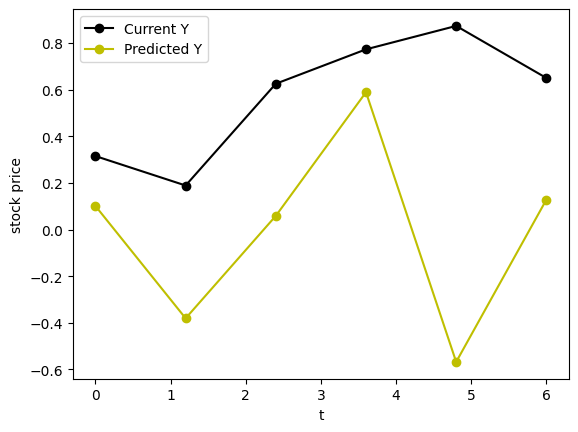

In [44]:
def plot_linear2(ys):
  test_t=np.linspace(0, len(ys), len(ys))
  plt.plot(test_t, test_labels, color='k', marker='o', label='Current Y')
  plt.plot(test_t, ys, color='y', marker='o', label='Predicted Y')
  #plt.plot(test_t, test_features[test_features.columns[0]], color='b', marker='o', label='X')
  plt.ylabel('stock price')
  plt.xlabel('t')
  plt.legend()
plot_linear2(ys)

In [ ]:
ys*1191+15459

In [ ]:
data2